<a href="https://colab.research.google.com/github/DanielaMorariu1990/Generate_image_captions/blob/main/word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word embeddings using Word2Vec model

In [4]:
from gensim.models import Word2Vec
import pickle
import numpy as np
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



## Split train descriptions by lines 
Create a word list for each sentance

In [1]:
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [6]:
def create_list_sentance(description):
    lines = to_lines(description)
    line_list = []
    for line in lines:
        line = line.split()
        line_list.append(line)
    return line_list
        

### Read in the data

Read training descriptions

Read tokenizer

In [7]:
with open('/content/drive/MyDrive/Colab Notebooks/Image_caption/train_descriptions.pkl', 'rb') as f:
        desc = pickle.load(f)

In [8]:
with open('/content/drive/MyDrive/Colab Notebooks/Image_caption/tokenizer.pkl', 'rb') as f:
        tok = pickle.load(f)

### Fit the Word2Vec model on the training descriptions

In [9]:
desc_sentance_vec=create_list_sentance(desc)

In [10]:
model = Word2Vec(sentences=desc_sentance_vec, size=300, window=3, min_count=1, workers=4, sg = 1)
#model.save("word2vec_fit.model")

In [ ]:
vocab_size = len(tok.word_index) + 1

In [ ]:
vocab = model.wv.vocab

### Getr the weights neede for the keras embedding layer from word2vec model

In [ ]:
def get_weight_matrix(token,vocab_size,model):
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, model.vector_size))
    j=0
    for i in token.word_index.keys():
        weight_matrix[j + 1] = model[i]
        j+=1
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(token=tok,vocab_size=vocab_size,model=model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26446328, -0.31699085,  0.18785663, ..., -0.11390606,
        -0.18727933, -0.1744093 ],
       [ 0.19075635, -0.0148838 ,  0.07297978, ..., -0.06955649,
         0.08922854,  0.06020009],
       ...,
       [-0.01049355, -0.03909328,  0.00903064, ..., -0.00685298,
        -0.00395579,  0.00739594],
       [ 0.00156223, -0.04765693, -0.01666857, ...,  0.01297245,
        -0.00232254,  0.0019314 ],
       [-0.00048223, -0.02369318, -0.00940616, ...,  0.00543844,
        -0.00290202, -0.00652821]])

Save weights for later use

In [ ]:
pickle.dump(embedding_vectors, open('embedding_vectors.pkl', 'wb'))

### Plot similar words given by the trained model
Use PCa (components=2) in order to vizualize them in 2 dimensions

In [19]:
def PCA_plot_similar_words(model, word):
    
    sim_words_vec = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.most_similar(word)
    
    # add the vector for each of the closest words to the array
    sim_words_vec = np.append(sim_words_vec, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        sim_words_vec = np.append(sim_words_vec, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    pca = PCA(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = pca.fit_transform(sim_words_vec)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

    plt.savefig(f"{word}.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


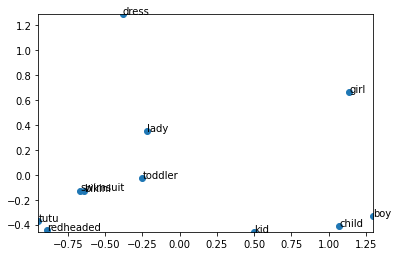

<Figure size 432x288 with 0 Axes>

In [20]:
PCA_plot_similar_words(model=model, word="girl")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


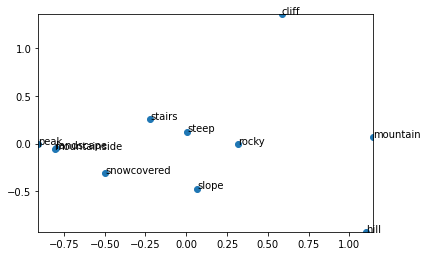

<Figure size 432x288 with 0 Axes>

In [21]:
PCA_plot_similar_words(model=model, word="mountain")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


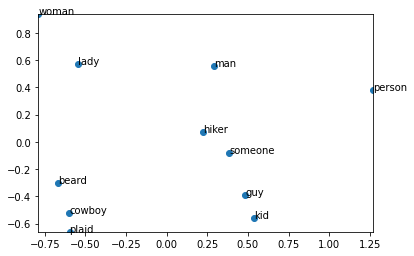

<Figure size 432x288 with 0 Axes>

In [22]:
PCA_plot_similar_words(model=model, word="man")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


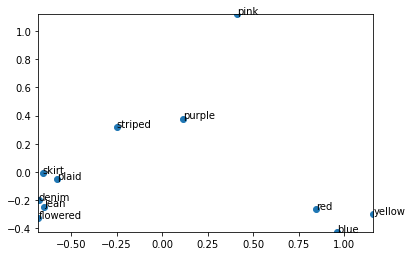

<Figure size 432x288 with 0 Axes>

In [23]:
PCA_plot_similar_words(model=model, word="pink")